# Project Drawdown Model Engine: Start Here

This jupyter notebook contains a top-level, minimal-code introduction to the PDME library.  It aims to introduce you to some of the features of the library and to show some common patterns that you might use to use the library for yourself.  It is _not_ a complete description of all the functionality of the PDME.  When you outgrow this introduction, investigate the [main documentation](https://projectdrawdown.github.io/solutions/) next.  

Suggestion: This notebook is too long to comfortably go through from top to bottom.  Instead, browse through the whole notebook quickly to get an overview, and then dig in more deeply in the sections you need.

(A helpful tutorial for jupyter notebooks is [here](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb), or [here](https://youtu.be/3C9E2yPBw7s?t=131) if you'd prefer a video introduction.)

Table of Contents:
* [Setup](#Setup)
* [Solutions](#Solutions)
* [Scenarios](#Scenarios)
    * [Scenario Parameters](#Looking-at-the-Scenario-Parameters)
    * [Scenario Outputs](#Scenario-Outputs)
        * [Unit Adoption](#Unit-Adoption)
        * [Costs](#Costs)
        * [Emissions](#Emissions)
        * [Key Results](#Key-Results)
* [Examining Solution Data](#Examining-Solution-Data)  _TODO_
* [Changing a Scenario](#Changing-a-Scenario)
* [Ocean Solutions](#Ocean-Solutions)  _TODO_
* [Common Code Patterns](#Common-Code-Patterns)  _TODO_

# Setup

Always run the cell below; it imports modules we'll use later.
(Run the cell by putting your cursor in it and clicking on the "&#9654; Run" button above.)

In [1]:
from solution import factory
import pandas as pd
from matplotlib import pyplot as plt
import json
from pathlib import Path

# Solutions

The PDME library contains all of the solutions published by Project Drawdown.  You can see the list of these solutions by running either of the two cells below.  (The Ocean solutions are missing from these lists for technical reasons that we will eventually resolve; for now see the section on [Oceans](#Oceans) below)

In [2]:
# Return the list of identifiers of all (non-Ocean) solutions

print(factory.all_solutions())

['afforestation', 'airplanes', 'altcement', 'bamboo', 'bikeinfrastructure', 'biochar', 'biogas', 'biogas_small', 'biomass', 'bioplastic', 'buildingautomation', 'carpooling', 'commercialglass', 'composting', 'concentratedsolar', 'conservationagriculture', 'coolroofs', 'coveredmanurelagoons', 'districtheating', 'electricbikes', 'electricvehicles', 'farmlandrestoration', 'forestprotection', 'geothermal', 'grasslandprotection', 'greenroofs', 'hcrecycling', 'heatpumps', 'hfc_replacement', 'highspeedrail', 'hybridcars', 'improvedcattlefeed', 'improvedcookstoves', 'improvedrice', 'indigenouspeoplesland', 'instreamhydro', 'insulation', 'irrigationefficiency', 'landfillmethane', 'leds_commercial', 'leds_residential', 'managedgrazing', 'mangroverestoration', 'masstransit', 'methaneleak', 'microwind', 'multistrataagroforestry', 'nuclear', 'nutrientmanagement', 'offshorewind', 'onshorewind', 'peatlandrestoration', 'peatlands', 'perennialbioenergy', 'recycledmetals', 'recycledpaper', 'recycledplast

In [3]:
# Return the list of ids and titles of all the (non-Ocean) solutions.
# This one is a little slower, because it is actually loading code for each solution

for soln_id in factory.all_solutions():
    soln = factory.load_solution(soln_id)
    print(f'{soln_id:>30}:  {soln.name}')

                 afforestation:  Afforestation
                     airplanes:  Aircraft Fuel Efficiency
                     altcement:  Alternative Cements
                        bamboo:  Bamboo
            bikeinfrastructure:  Bike Infrastructure
                       biochar:  Biochar
                        biogas:  Large Biodigesters (Biogas)
                  biogas_small:  Small Biogas Digesters
                       biomass:  Biomass from Perennial Crops for Electricity Generation
                    bioplastic:  Bioplastics
            buildingautomation:  Building Automation Systems
                    carpooling:  Ridesharing & Carpooling
               commercialglass:  High-Performance Glass (Commercial)
                    composting:  Composting
             concentratedsolar:  Concentrated Solar Power (CSP)
       conservationagriculture:  Conservation Agriculture
                     coolroofs:  Cool Roofs
          coveredmanurelagoons:  Covered Anaerobic Lagoons


# Scenarios

A Solution describes a type of technology to address climate change, but a Scenario defines a set of specific assumptions about that technology, including its cost, effectiveness and adoption.  When working the the PDME, we will usually be working with Scenarios.

Solutions may have any number of Scenarios.  Those published with the PDME will always have at least three Scenarios which illustrate the most recent "Plausible", "Drawdown" and "Optimum" scenarios published by Project Drawdown.  To make matters simple, these are always accessible by the labels "PDS1", "PDS2" and "PDS3".

Here we list the scenarios available within the PDME code for a specific Solution (Bike Infrastructure), then load the Drawdown Scenario for that Solution:

In [4]:
print(factory.list_scenarios("electricvehicles"))

# The names returned in the print are the full code names of the scenarios, but we will use the
# PDS2 shortcut to load the Drawdown scenario.

ecars2 = factory.load_scenario("electricvehicles", "PDS2")
ecars2.scenario

['PDS1-21p2050-ComDat-FullyIntegrated', 'PDS2-33p2050-ComDat-FullyIntegrated', 'PDS3-92p2050-ComData-FullyIntegrated']


'PDS2-33p2050-ComDat-FullyIntegrated'

### Looking at the Scenario Parameters

There are many parameters that are used to define a Scenario, and some of those parameters are more arcane than others.  The `key_inputs` method returns a set of the most important scalar parameter values.

In [5]:
ecars2.key_inputs()

{'pds_2014_cost': 36317.523345066766,
 'soln_lifetime_capacity': 0.000346582848014648,
 'soln_avg_annual_use': 2.4485619375e-05,
 'soln_fixed_oper_cost_per_iunit': 634.2005524308272,
 'soln_var_oper_cost_per_funit': 13224200.431077885,
 'soln_energy_efficiency_factor': 0.0,
 'soln_fuel_efficiency_factor': 0.8964768329017938,
 'soln_emissions_per_funit': 0.0,
 'soln_indirect_co2_per_iunit': 12.55864172870986}

The parameter names can be a bit cryptic.  We can (sometimes) get a better explanation of what they mean by using the `explain_parameter` method:

In [6]:
print(ecars2.ac.explain_parameter('soln_var_oper_cost_per_funit'))

SOLUTION Variable Operating Cost (VOM)
NOTE: This is the annual operating cost per functional unit, derived from the SOLUTION. In most cases this will be expressed as a cost per 'some unit of energy'.

E.g., $1 per Kwh or $1,000,000,000 per TWh. In terms of transportation, this can be considered the weighted average price of fuel per passenger kilometer.


The other major input is Adoption, which is the amount of some good or service that is *provided or supported by* the solution technology.

Let's look at the adoption of this scenario:

In [7]:
ecars2_adoption = ecars2.ht.soln_pds_funits_adopted()
ecars2_adoption

World  OECD90  Eastern Europe  Asia (Sans Japan)  Middle East and Africa  Latin America  China  India   EU  USA
Year                                                                                                                        
2014    116.388993     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2015    121.576689     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2016    126.764385     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2017    131.952081     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2018    137.139777     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2019    100.956104     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2020    183.949188     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2021    290.436083     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2022    421.080403     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2023    576.545759     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2024    757.495765     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2025    964.594032     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2026   1198.504174     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2027   1459.889802     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2028   1749.414529     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2029   2067.741967     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2030   2415.535730     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2031   2793.459429     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2032   3202.176677     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2033   3642.351087     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2034   4114.646271     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2035   4619.725841     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2036   5158.253410     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2037   5730.892591     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2038   6338.306995     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2039   6981.160236     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2040   7660.115926     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2041   8375.837677     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2042   9128.989102     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2043   9920.233814     0.0             0.0                0.0                     0.0            0.0    0.0    0.0  0.0  0.0
2044  10750.2

This result demonstrates a number of important things:

* `ecars2.ht.soln_pds_funits_adopted()` is an example of a pattern `<scenario>.<category>.<methodname>()` that is common across the PDME library.  The category identifies an area of analysis for the scenario.  The methodname identifies what you want to know within that category.  We'll cover the list of most important categories and methods TODOTODOTODO.
* The input adoption is specified in something called 'functional units' (aka 'funits'), which varies by Solution.  You can find out what the different kind of units for a Solution are with the expression `<scenario>.units`
* You can see above that there are multiple columns of adoption data, which are associated with different regions of the world.  For many solutions, including this one, we do not have data at the regional level, and only the `World` column will be filled in. 
* The output of this method (and many others) is a [Pandas](https://pandas.pydata.org/docs/index.html) DataFrame.  Pandas is a popular Python library for data manipulation that makes it easy to do many numerical and statistical operations, and also to graph the data.  You don't need to know much Pandas to do basic operations with PDME, but it will help when you want to do more sophisticated analysis of your own.

Illustrating these points:

In [8]:
# Show the units associated with this solution
ecars2.units

{'implementation unit': 'vehicle',
 'functional unit': 'billion passenger-km',
 'first cost': 'US$B',
 'operating cost': 'US$B'}

In [9]:
# Show only 'World' data.
ecars2_adoption['World']

Year
2014      116.388993
2015      121.576689
2016      126.764385
2017      131.952081
2018      137.139777
2019      100.956104
2020      183.949188
2021      290.436083
2022      421.080403
2023      576.545759
2024      757.495765
2025      964.594032
2026     1198.504174
2027     1459.889802
2028     1749.414529
2029     2067.741967
2030     2415.535730
2031     2793.459429
2032     3202.176677
2033     3642.351087
2034     4114.646271
2035     4619.725841
2036     5158.253410
2037     5730.892591
2038     6338.306995
2039     6981.160236
2040     7660.115926
2041     8375.837677
2042     9128.989102
2043     9920.233814
2044    10750.235424
2045    11619.657545
2046    12529.163790
2047    13479.417772
2048    14471.083102
2049    15504.823394
2050    16581.302259
2051    17701.183310
2052    18865.130160
2053    20073.806421
2054    21327.875706
2055    22628.001627
2056    23974.847796
2057    25369.077827
2058    26811.355331
2059    28302.343921
2060    29842.707210
Name: Wo

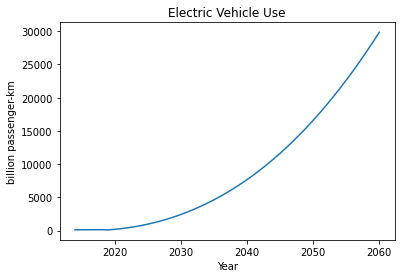

In [10]:
# Graph the world adoption data, with the units as an axis label.
# Here we are using the default Pandas plotting function

ecars2_adoption['World'].plot(ylabel=ecars2.units['functional unit'], title='Electric Vehicle Use');

The adoption data for this scenario is estimated from 2014 to 2060.  You often want to look at the data from the current year onwards.  (Side note: there is some inconsistency between scenarios in how they handle "prior" data, so it is generally advised to ignore data before the current year.)

The pandas syntax to select a subset of years (rows) is a little obscure: use `somedf.loc[minyear:maxyear]`.  Note the use of square brackets instead of the parenthesis you might expect.

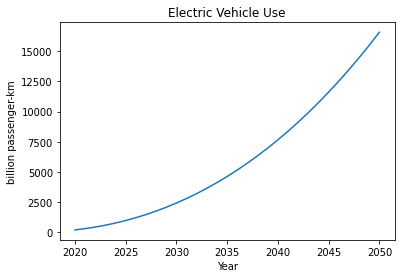

In [11]:
# this is legal:  ecars2_adoption.loc[2020:2050]['World']
# so is this:     ecars2_adoption['World'].loc[2020:2050]
# or you can combine them:

ecars2_ad = ecars2_adoption.loc[2020:2050,'World']

ecars2_ad.plot(ylabel=ecars2.units['functional unit'], title='Electric Vehicle Use');

### Scenario Outputs

The key outputs of a PDME model are the (1) the implimentation unit (iunit) adoption, (2) costs of achieving it (how much money is required to install and use the solution at the level required by the adoption), and the (3) CO2-e emissions that result.  It is possible to get results as plots over time (as we have seen with adoption above), or as summaries over the entire scenario period up to 2050.  We'll walk through some of these for our Electric Cars scenario.


#### Unit Adoption
First let's look at iunit adoption.  Recall that adoption is an _input_, but that adoption input is specified in _functional_ units,
which for the electric vehicle solution is measured in billion passenger-km.  How many _implementation_ units (electric cars)
are required to provide those billions of km?  We will find answers to questions about implementation units
in the Unit Adoption (`ua`) component of the scenario:

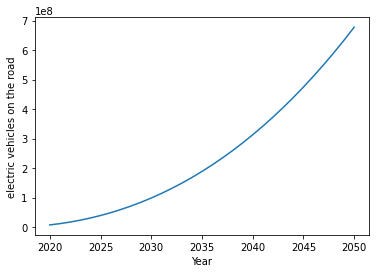

In [12]:
ecars2_cars_on_roads = ecars2.ua.soln_pds_tot_iunits_reqd().loc[2020:2050,'World']
ecars2_cars_on_roads.plot(ylabel="electric vehicles on the road");

Those are the total number of electric vehicles on the road for each year, but how many _new_ vehicles are required each year, including replacement of older vehicles?

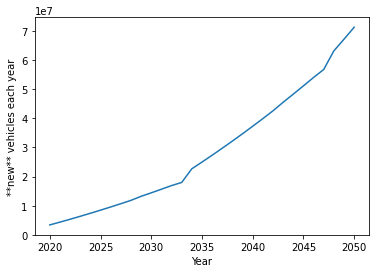

In [13]:
ecars2_new_cars_each_year = ecars2.ua.soln_pds_new_iunits_reqd().loc[2020:2050,'World']
ecars2_new_cars_each_year.plot(ylabel="**new** vehicles each year");

As you can see, the number of new EVs is an order of magnitude less than the total EVs (note the scale is 1e7 vs 1e8).  Also, the "bumps" you see in this graph are the result of how the PDME models the vehicle lifetimes, as a single constant number rather than a probability distribution (this is a possible area of enhancement in the future).

#### Costs
Now let's look at costs. PDME models costs as 'first', 'fixed' and 'variable'.  First cost is the cost to acquire/build/deploy an implementation unit (e.g. the cost to buy an EV).  Fixed costs are per-unit costs that remain the same per year, regardless of usage (like insurance), while variable costs depend on the usage of the object (e.g. the cost of electricity to recharge the EV).  First Cost information is found in the `fc` module, while fixed and variable costs are covered in the Operating Cost `oc` module.  In this example we're going to add those together to show the total cost over time.

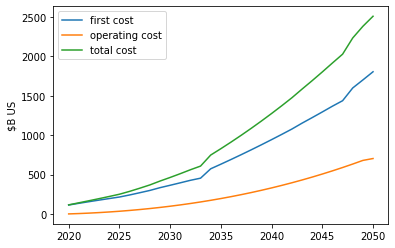

In [14]:
ecars2_first_cost = ecars2.fc.soln_pds_annual_world_first_cost().loc[2020:2050]
ecars2_operating_cost = ecars2.oc.soln_pds_annual_operating_cost().loc[2020:2050]
ecars2_total_cost = ecars2_first_cost + ecars2_operating_cost   # adding two arrays is easy

# Here we are doing a more complex plot so we can put multiple lines on the same plot.
# We also divide the values to produce an easier to read y-range in billions of dollars

x_axis = range(2020,2051)
plt.plot(x_axis, ecars2_first_cost / 1000000000, label='first cost')
plt.plot(x_axis, ecars2_operating_cost / 1000000000, label='operating cost')
plt.plot(x_axis, ecars2_total_cost / 1000000000, label='total cost')
plt.ylabel("$B US")
plt.legend();

We can see that according to this model, the first cost is much greater than the ongoing operational cost, and the total cost would be around 2.5 Trillion dollars in 2050.

Note: not all Solutions include cost modeling.  You'll just get a bunch of zeros or NaNs if you look at cost data for a Solution that does not support it.  Also note that most of the cost functions only provide results for global data, not regional.

#### Emissions

PDME models emissions in four different categories:
1. _direct_ emissions, due either to chemical processes or the use of fuel by the solution,
1. _electric_ emissions, due to the use of electric power (the amount of which in turn depends on the mix of electric power generation technologies in place),
1. _indirect_ emissions, emissions required to produce goods or products required to provide the solution,
1. _sequestration_, which is effectively "negative emissions", that occur as a result of the solution (only considered for Land and Ocean solutions).

In addition, direct emissions can be in CO2 or NO2 or methane (CH4), or dealt with in combined CO2e (CO2-equivalent).

Unlike the other outputs we have seen so far, emissions effects are generally specified _relative to conventional practice_.  There are a number of functions in the Unit Adoption (`ua`) module that will give details about each of these categories separately: you can find them in the documentation with names like `ua.soln_pds_direct_co2_emissions_saved()`.  Here we will show you the function you will most often want to see first: the aggregate of all the categories, in the function `c2.co2eq_mmt_reduced()`, which is the total net change in greenhouse gas emissions across all categories.

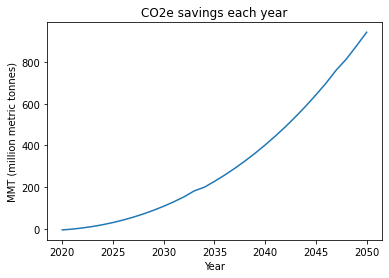

In [15]:
ecars2_emissions_reduced = ecars2.c2.co2eq_mmt_reduced().loc[2020:2050,'World']
ecars2_emissions_reduced.plot(title="CO2e savings each year", ylabel="MMT (million metric tonnes)");

Here we can see, for example, that by 2045, Electric Vehicles are emitting 600 MMT less CO2e per year than standard vehicles would.

The PDME also has an implementation of the FAIR model, which is used to translate changes in _emissions_ to changes in the actual _level of greenhouse gasses_ in the atmosphere over time.  There are some additional notebooks introducing these more advanced concepts in the Documentation folder.

#### Key Results

Finally, there is a simple way to get a summary of the aggregate impact of a scenario across all these outputs in one simple call:

In [16]:
ecars2.get_key_results()

{'implementation_unit_adoption_increase': 664804755.8915443,
 'functional_unit_adoption_increase': 16278.156211450143,
 'marginal_first_cost': -6.015345449894531,
 'net_operating_savings': 9343.38581733759,
 'lifetime_operating_savings': 15537.877155690088,
 'cumulative_emissions_reduced': 9.761350157338795}

Each of these values is a sum over the lifetime of the scenario (e.g. through 2050), _compared to a baseline scenario_.  We haven't really talked about the baseline before, but usually you can think of it as 'keep doing what we are already doing'.  You will see these two refered to in the code as 'PDS' (the scenario) and 'REF' (the baseline). 

What we are already doing costs money, has emissions, etc., so these numbers represent the delta from that.   In this case, you can see that this scenario actually costs less (in both first cost and operating cost) than be reference baseline.  The costs are in billions US$.  (The 'lifetime' operating savings refers to costs of long-lived items like power plants over their lifetimes.  In the context of a solution such as electric vehicles, it doesn't really mean anything.)

# Examining Solution Data

One of the key features of the Project Drawdown approach is that parameters such as cost and adoption are not simply provided as values with no context.  Each parameter has a set of values behind it that have been derived from the literature.  Then for each scenario, the researcher has used this background data to guide the choice of each parameter value in a coherent way.

So one of the things you might want to do is to explore what the background data is, which is the topic of this section.

**TODO** **TODO**

# Changing a Scenario
Sometimes you might like to try a variation on a given Scenario to see what the impact would be.  You can do that by creating a new Scenario with modified values.  For example, let's try increasing the average annual use of an EV.  Average annual use is measured in (functional units) / (implementation unit) / year.  In our ecars2 Scenario, that is 2.44e-05 (billion passenger km) / EV, or 24400 km / EV annually.  Let's suppose we think people will share cars more, and so this value should be more like 30000.  Here is how we would do that:

In [17]:
# Create a new Advanced Controls object (parameter set) that is just like the current one, but changes that one parameter.
newac = ecars2.ac.with_modifications(soln_avg_annual_use=3e-5)

# Use that new set of parameters to create another scenario for the EV Solution
newscenario = factory.load_scenario('electricvehicles', newac)

Let's see how that affects the total number of EVs required, shall we?

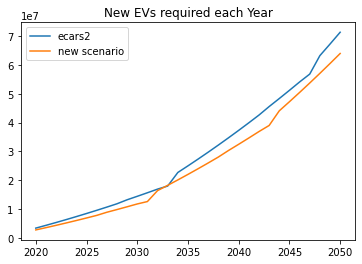

In [18]:
x_axis = range(2020,2051)
plt.plot(x_axis, ecars2.ua.soln_pds_new_iunits_reqd().loc[2020:2050,'World'], label='ecars2')
plt.plot(x_axis, newscenario.ua.soln_pds_new_iunits_reqd().loc[2020:2050,'World'], label='new scenario')
plt.title("New EVs required each Year")
plt.legend();

You can experiment for yourself comparing other outputs to see what else has changed.  Note also that you can change more than one parameter at a time, you just add them all to the `with_modifications` function:

In [20]:
newerac = ecars2.ac.with_modifications(
    soln_avg_annual_use=3e-5,
    soln_fixed_oper_cost_per_iunit=800
    # as many as you want to add...
)
newerscenario = factory.load_scenario("electricvehicles",newerac)

If you want to save a scenario you have created and use it again, you can save it to a file and later reload it.  

(Note: if you are running this notebook in a hosted environment, can print out the AdvancedControls object, and copy and paste it to a file instead.)

In [21]:
filename = "my_temp_scenario.json"
newerscenario.ac.write_to_json_file(filename)

# then later, load it back
reloaded_params = json.loads(Path(filename).read_text(encoding='utf-8'))  # reload the params from the file
reloaded_scenario = factory.load_scenario("electricvehicles", reloaded_params)  # create a new Scenario object

reloaded_scenario.key_inputs()                   

{'pds_2014_cost': 36317.523345066766,
 'soln_lifetime_capacity': 0.000346582848014648,
 'soln_avg_annual_use': 3e-05,
 'soln_fixed_oper_cost_per_iunit': 800,
 'soln_var_oper_cost_per_funit': 13224200.431077885,
 'soln_energy_efficiency_factor': 0.0,
 'soln_fuel_efficiency_factor': 0.8964768329017938,
 'soln_emissions_per_funit': 0.0,
 'soln_indirect_co2_per_iunit': 12.55864172870986}

### Altering Adoption

The instructions above will allow you to experiment with variations in the scalar paramters for a Solution, but what about adoption?  You can alter that as well, though the technique is a bit hacky.  There is a special parameter that will allow you to specify a 'custom adoption' to load in place of the standard adoption.  The adoption must be identified by a URI, and the adoption will be read from that URI as if it were reading from the official PDME source files.  The format of the data must be the same CSV file format that is used for the official adoption data sources.   Here is what it would look like:

In [ ]:
# This cell won't work unless you can make the URI point to the appropriate data.
# TODO: figure out some way to host sample data so that it _will_ work

my_adoption_uri = "file://some_file_somewhere"
params = ecars2.ac.with_modifications(
    pds_adoption_custom_source=my_adoption_uri   # this is the key line
)
scenario_with_new_adoption = factory.load_scenario("electricvehicles", params)

### Creating New Solutions
So far we've talked about creating new Scenarios for existing Solutions.  It is also possible to create your own Solution, but the steps involved are not yet documented.  The basic starting point would be to copy an existing solution directory to a new name and start modifying the code.  Aside from changing names of things, the primary requirement is accumulating the backing data and storing it in the proper format as part of your new Solution.

# Ocean Solutions
All the discussion and examples in this notebook have been about RRS (Reduction and Replacement) or Land Solutions.  There are also Ocean Solutions.  Conceptually (and mathematically), they are essentially the same as the others, however the code that implements them is almost entirely different.  This difference is temporary (for some definition of temporary): we plan to merge the two implementations in time.  For now, however, you need to use a different set of functions to do the same things we have demonstrated above.  In this section, we'll demonstrate some of the differences.

# Common Code Patterns